
# Exercise 10 - Neural Network Representational Capacity



## Tasks

Change the number of neurons in the hidden layers and the number of layers. Observe how the output changes and how the number of parameters changes (checked with summary from the torchsummary package).
Derive a formula for the number of trainable parameters assuming two input neurons, one output neuron,
 hidden layers with
 neurons each. What is the number of biases
 and the number of weights
 ? Verify your result with the output from summary.

In [2]:
!pip install torchinfo

# para instalar o torchinfo, para rodar no colab

In [ ]:
import torch
from torchinfo import summary

## Helper function

weight initialization

In [ ]:
def initWeights(m):
    """Initialize weights of neural network with xavier initialization."""
    if (
            type(m) == torch.nn.Linear
            or type(m) == torch.nn.Conv2d
            or type(m) == torch.nn.Conv3d
    ):
        torch.nn.init.uniform_(m.weight, a=-10, b=10)
        torch.nn.init.uniform_(m.bias, a=-1, b=1)

neural network definition

In [ ]:
class NN(torch.nn.Module):
    def __init__(
            self,
            inputDimension,
            hiddenDimensions,
            outputDimension,
            activationFunction=torch.nn.Tanh(),
    ):
        super().__init__()

        modules = []

        modules.append(torch.nn.Linear(inputDimension, hiddenDimensions[0]))
        modules.append(activationFunction)
        for i in range(len(hiddenDimensions) - 1):
            modules.append(
                torch.nn.Linear(hiddenDimensions[i], hiddenDimensions[i + 1])
            )
            modules.append(activationFunction)
        modules.append(torch.nn.Linear(hiddenDimensions[-1], outputDimension))

        self.model = torch.nn.Sequential(*modules)

    def forward(self, x):
        u = self.model(x)
        return u

## Neural network definition & sampling

model definition

In [ ]:
torch.manual_seed(5)

numberOfHiddenNeurons = 100
numberOfLayers = 10

hiddenDimensions = [numberOfHiddenNeurons] * numberOfLayers
activationFunction = torch.nn.Sigmoid()
model = NN(2, hiddenDimensions, 1, activationFunction)
model.apply(initWeights)

summary(model, (1, 2))

Layer (type:depth-idx)                   Output Shape              Param #
NN                                       [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 100]                  300
│    └─Sigmoid: 2-2                      [1, 100]                  --
│    └─Linear: 2-3                       [1, 100]                  10,100
│    └─Sigmoid: 2-4                      [1, 100]                  --
│    └─Linear: 2-5                       [1, 100]                  10,100
│    └─Sigmoid: 2-6                      [1, 100]                  --
│    └─Linear: 2-7                       [1, 100]                  10,100
│    └─Sigmoid: 2-8                      [1, 100]                  --
│    └─Linear: 2-9                       [1, 100]                  10,100
│    └─Sigmoid: 2-10                     [1, 100]                  --
│    └─Linear: 2-11                      [1, 100]                  1

grid definition

In [ ]:
Nx = 1000
Ny = 500

x = torch.linspace(-1, 1, Nx)
y = torch.linspace(-0.5, 0.5, Ny)
x, y = torch.meshgrid(x, y, indexing="ij")
input = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1)), 1)
with torch.no_grad():
    output = model(input).detach().reshape((Nx, Ny))

## Output Visualization

Optional: zoomable, automatically updating output visualization:

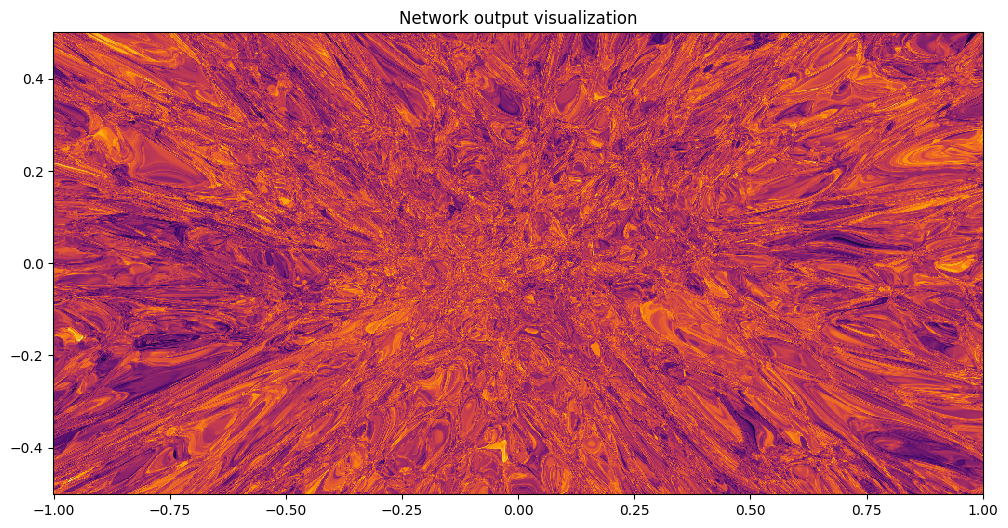

In [ ]:
INTERACTIVE_PLOT = False

if not INTERACTIVE_PLOT:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 6))
    cp = ax.pcolormesh(
        x, y, output, cmap=plt.cm.inferno, shading='auto'
    )  # colormap inferno or plasma look great
    plt.title('Network output visualization')
    plt.show()

else:               # interactive
    # These lines (and likely a kernel restart) should make an interactive plot.
    # Depends on platform/install details
    import matplotlib
    matplotlib.use('qtagg')
    # %matplotlib widget
    import matplotlib.pyplot as plt

    class ZoomPlot():

        def __init__(self):
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(111)
            self.xmin = -2.
            self.xmax = 2.
            self.ymin = -2.
            self.ymax = 2.
            self.xpress = self.xmin
            self.xrelease = self.xmax
            self.ypress = self.ymin
            self.yrelease = self.ymax
            self.resolution = 400
            self.maxiters = 30

            self.fig.canvas.mpl_connect('button_press_event', self.onpress)
            self.fig.canvas.mpl_connect('button_release_event', self.onrelease)
            self.plot_fixed_resolution(self.xmin, self.xmax,
                                    self.ymin, self.ymax)

        def plot_fixed_resolution(self, x1, x2, y1, y2):
            x = torch.linspace(x1, x2, self.resolution)
            y = torch.linspace(y1, y2, self.resolution)

            x, y = torch.meshgrid(x, y, indexing="ij")
            input = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1)), 1)
            with torch.no_grad():
                output = model(input).detach().reshape((self.resolution, self.resolution))

            self.ax.clear()
            self.ax.set_xlim(x1, x2)
            self.ax.set_ylim(y1, y2)
            self.ax.pcolormesh(
                x, y, output, cmap=plt.cm.inferno, shading='auto')  # colormap inferno or plasma look great
            plt.title('Interactive plot, click and drag cursor')
            plt.show()
            self.fig.canvas.draw()

        def onpress(self, event):
            if event.button != 1: return
            self.xpress = event.xdata
            self.ypress = event.ydata

        def onrelease(self, event):
            if event.button != 1: return
            self.xrelease = event.xdata
            self.yrelease = event.ydata
            self.xmin = min(self.xpress, self.xrelease)
            self.xmax = max(self.xpress, self.xrelease)
            self.ymin = min(self.ypress, self.yrelease)
            self.ymax = max(self.ypress, self.yrelease)
            self.plot_fixed_resolution(self.xmin, self.xmax,
                                    self.ymin, self.ymax)


    plot = ZoomPlot()